In [47]:
from keras.datasets import mnist
import numpy as np

### Loda Data

In [48]:
(x_train, _), (x_test, _) = mnist.load_data()

### 归一化并进行数据格式转换

In [49]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

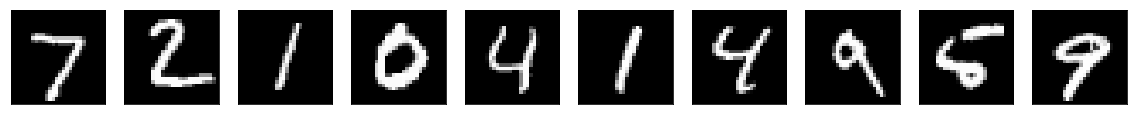

In [50]:
# 加噪后的图像效果
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
plt.figure(figsize = (20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 添加随机白噪声，并限制加噪声后像素值仍处于0至1之间:

In [51]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

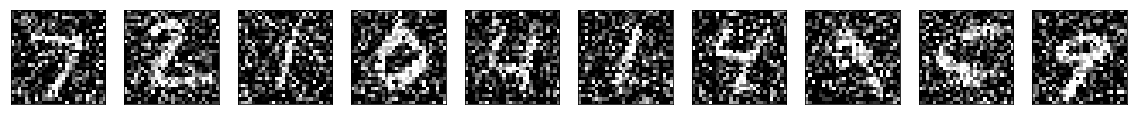

In [52]:
# 加噪后的图像效果
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
plt.figure(figsize = (20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 建立网络 

In [53]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, load_model

# 定义模型输入
input_img = Input(shape = (28, 28, 1,))  # N * 28 * 28 * 1

#### 实现encoder部分

In [54]:
# 28 * 28 * 1
x = Conv2D(32, (3, 3), padding = "same", activation = "relu")(input_img) # 28 * 28 * 32
x = MaxPooling2D((2, 2), padding = "same")(x)                            # 14 * 14 * 32
x = Conv2D(32, (3, 3), padding = "same", activation = "relu")(x)         # 14 * 14 * 32
encoded = MaxPooling2D((2, 2), padding = "same")(x)                      # 7 * 7 * 32

#### 实现decoder部分

In [55]:
# 7 * 7 * 32
x = Conv2D(32, (3, 3), padding = "same", activation = "relu")(encoded)  # 7 * 7 * 32
x = UpSampling2D((2, 2))(x)                                             # 14 * 14 * 32
x = Conv2D(32, (3, 3), padding = "same", activation = "relu")(x)        # 14 * 14 * 32
x = UpSampling2D((2, 2))(x)                                             # 28 * 28 * 32)
decoded = Conv2D(1, (3, 3), padding = "same", activation = "sigmoid")(x)# 28 * 28 * 1

#### 将输入和输出连接，构成自编码器并编译模型

In [56]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = "adadelta", loss = "binary_crossentropy")

#### 训练模型并验证模型

In [57]:
# autoencoder.fit(x_train_noisy, x_train, 
#                 epochs = 100, 
#                 batch_size = 128, 
#                 shuffle = True, 
#                 validation_data = (x_test_noisy, x_test))
# autoencoder.save("autoencoder.h5")

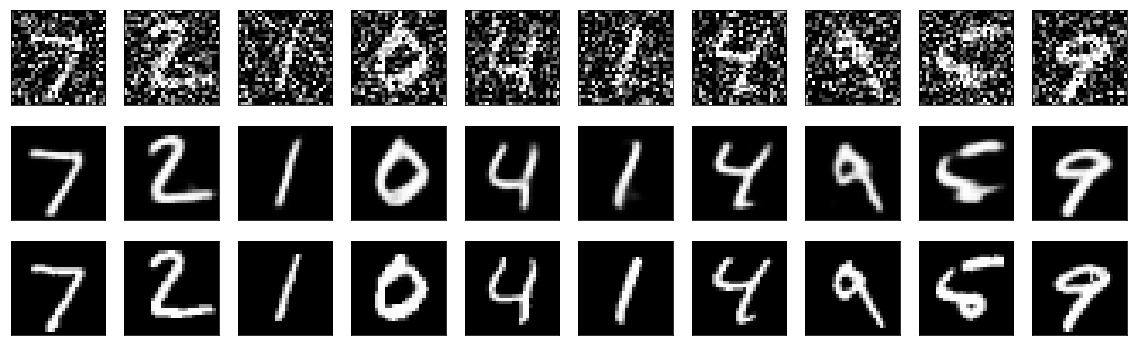

In [58]:
autoencoder = load_model("autoencoder.h5")
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize = (20, 6))
for i in range(n):
    # disploy original 
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display testing dataset
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()